In [2]:
#Fix your enviroment
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from codes.module1_mesh import *
from codes.module2_forward import *
from codes.module3_inverse import *
from codes.module4_auxiliar import *
%matplotlib inline

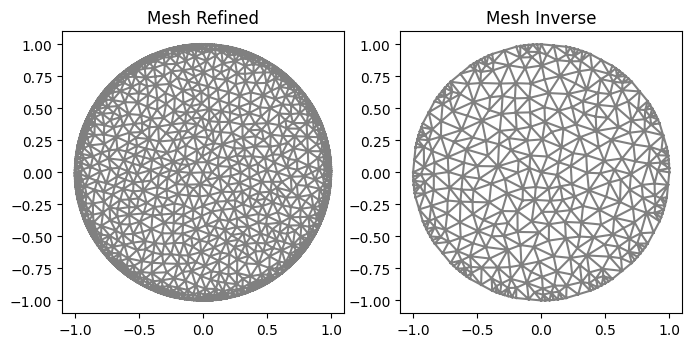

In [3]:
"Mesh"
ele_pos=electrodes_position(L=16, per_cober=0.5, rotate=0) 
mesh_inverse=MyMesh(r=1, n=10, n_in=7, n_out=0, electrodes_obj=ele_pos)
mesh_refined=MyMesh(r=1, n=15, n_in=25, n_out=10, electrodes_obj=ele_pos)

"Plot"
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_refined, title="Mesh Refined");
plt.subplot(1,2,2)
plot(mesh_inverse, title="Mesh Inverse");
plt.savefig("createfunc/mesh.png", bbox_inches='tight', transparent=True)

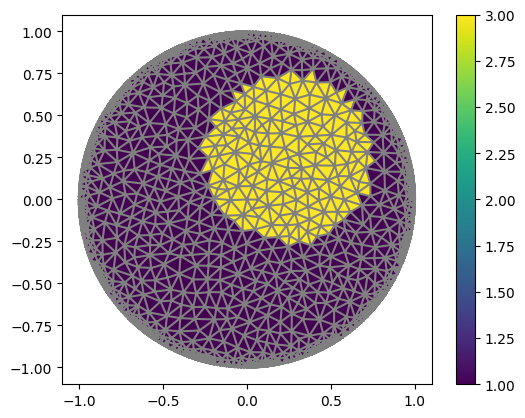

In [4]:
ValuesCells0=GammaCircle(mesh_refined,3.0,1.0,0.50, 0.25, 0.25);
Q = FunctionSpace(mesh_refined, "DG", 0) #Define Function space with basis Descontinuous Galerkin
gamma = Function(Q)
gamma.vector()[:]=ValuesCells0          


"Plot"
p=plot(gamma, title="")
plot(mesh_refined)
plt.colorbar(p)
plt.savefig("createfunc/gamma0.png", bbox_inches='tight', transparent=True)

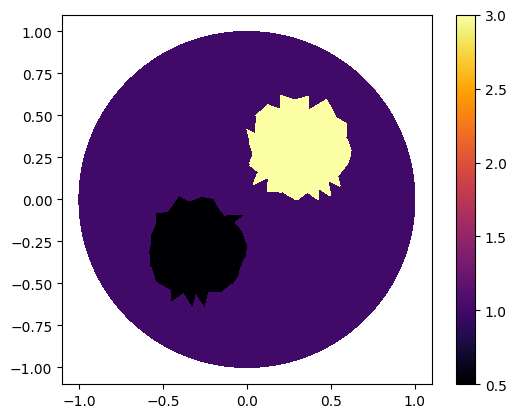

In [17]:
ValuesCells0=GammaCircle(mesh_refined,2.5,0.5,0.30, 0.30, 0.30);
ValuesCells1=GammaCircle(mesh_refined,0.0,0.5,0.30, -0.30, -0.30);
gamma.vector()[:]=ValuesCells0+ValuesCells1          

plot_figure(gamma, name="", map="inferno");
plt.savefig("createfunc/gamma1.png", bbox_inches='tight', transparent=True)

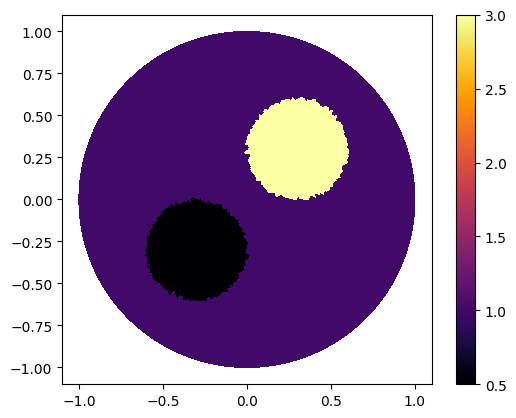

In [16]:
mesh_refined2=MyMesh(r=1, n=50, n_in=25, n_out=10, electrodes_obj=ele_pos)

ValuesCells0=GammaCircle(mesh_refined2,2.5,0.5,0.30, 0.30, 0.30);
ValuesCells1=GammaCircle(mesh_refined2,0.0,0.5,0.30, -0.30, -0.30);
Q2 = FunctionSpace(mesh_refined2, "DG", 0)
gamma2 = Function(Q2)
gamma2.vector()[:]=ValuesCells0+ValuesCells1

plot_figure(gamma2, name="", map="inferno");
plt.savefig("createfunc/gamma2.png", bbox_inches='tight', transparent=True)


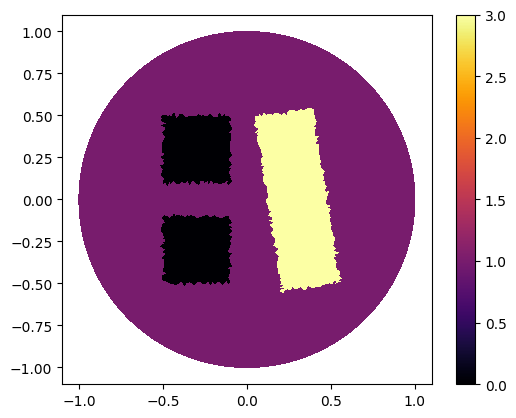

In [15]:
def GammaRec(mesh, in_v, out_v, radius,centerx, centery, angle=0, a=1, b=1):
    ValuesGamma=np.zeros(mesh.num_cells())
    centerx_new = centerx*cos(angle)-centery*sin(angle)
    centery_new = centery*cos(angle)+centerx*sin(angle)
    centerx, centery=centerx_new, centery_new
    
    for i in range(0, mesh.num_cells()):
        cell = Cell(mesh, i)
        
        vertices=np.array(cell.get_vertex_coordinates())
        x=(vertices[0]+vertices[2]+vertices[4])/3           
        y=(vertices[1]+vertices[3]+vertices[5])/3
        
        "rotation"
        x_new=x*cos(angle)-y*sin(angle)
        y_new=y*cos(angle)+x*sin(angle)
        x,y=x_new,y_new
        

        
        if (1/a*abs(x-centerx)>=radius) or 1/b*abs(y-centery)>=radius:
            ValuesGamma[i]=out_v
        else:
            ValuesGamma[i]=in_v
    
    return ValuesGamma


ValuesCells1=GammaRec(mesh_refined2, 3.0, 1.0, 0.35, 0.3, 0.0, pi/2*0.9, 1.5, 0.5);
ValuesCells2=GammaRec(mesh_refined2,-1.0, 0.0, 0.2, -0.30, -0.30);
ValuesCells3=GammaRec(mesh_refined2,-1.0, 0.0, 0.2, -0.30, 0.30);
gamma2.vector()[:]=ValuesCells1+ValuesCells2+ValuesCells3      

plot_figure(gamma2, name="", map="inferno");
plt.savefig("createfunc/gamma3.png", bbox_inches='tight', transparent=True)


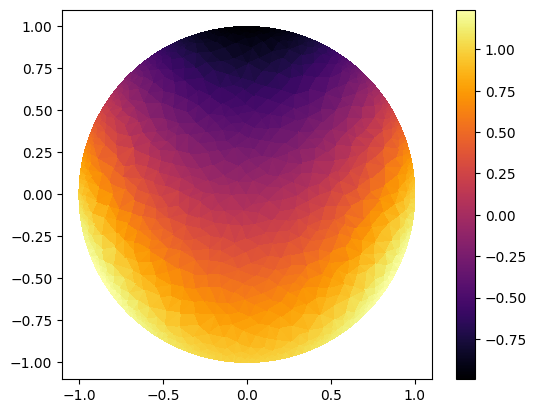

In [10]:
def evalinElement(mesh, u, cell_number):
    cell = Cell(mesh, cell_number)
    vertices=np.array(cell.get_vertex_coordinates())
    x=(vertices[0]+vertices[2]+vertices[4])/3           
    y=(vertices[1]+vertices[3]+vertices[5])/3
   
    result=u(x,y)   
    return result

func=Expression("pow(x[0],2)-x[1]", degree=2)

mesh=mesh_refined
ValuesCells4=np.zeros(mesh.num_cells())
for cell_index in range(mesh.num_cells()):
    ValuesCells4[cell_index]=evalinElement(mesh, func, cell_index)
    
gamma.vector()[:]=ValuesCells4          

plot_figure(gamma, name="", map="inferno");
plt.savefig("createfunc/gamma4.png", bbox_inches='tight', transparent=True)


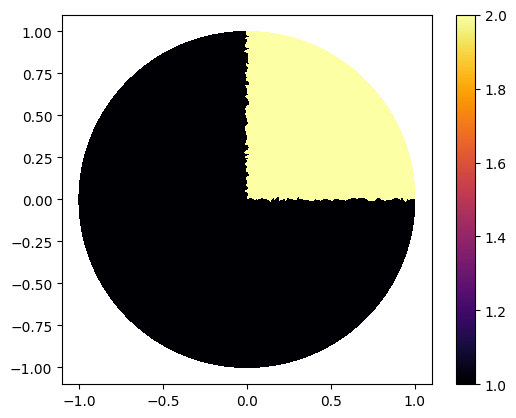

In [14]:
func2=Expression("x[1]>= 0 & x[0]>=0 ? 2 : 1 ", degree=2)

mesh=mesh_refined2
ValuesCells5=np.zeros(mesh.num_cells())
for cell_index in range(mesh.num_cells()):
    ValuesCells5[cell_index]=evalinElement(mesh, func2, cell_index)
    
gamma2.vector()[:]=ValuesCells5
plot_figure(gamma2, name="", map="inferno");
plt.savefig("createfunc/gamma5.png", bbox_inches='tight', transparent=True)

